In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ratings=pd.read_csv('../../dataset/ml-20m/ratings.csv')
df_ref=pd.read_csv('../new_dataset/correspondances_Id_movie')
df_ref.head()

,imdbId,movieId_2,imdbId.1,movieId,movieId_ref
0,114709,1,114709,1,1.0
1,113497,2,113497,2,2.0
2,113228,3,113228,3,3.0
3,114885,4,114885,4,4.0
4,113041,5,113041,5,5.0


In [5]:
ratings.index=ratings.movieId
df_ref.index=df_ref.movieId
ratings=ratings.join(df_ref.movieId_ref)
ratings=ratings.drop(["timestamp", "movieId"], axis=1)
ratings=ratings.dropna(subset=["movieId_ref"])
print(len(ratings.movieId_ref.unique()))
ratings.movieId_ref=ratings.movieId_ref.astype(int)

#ratings.reset_index()
ratings.head()

23608


,userId,rating,movieId_ref
movieId,,,
1,3,4.0,1
1,6,5.0,1
1,8,4.0,1
1,10,4.0,1
1,11,4.5,1


In [6]:
movie_df=pd.read_csv("../new_dataset/movie_df.csv")
movie_df=movie_df.drop(['tconst', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'adult', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'romance', 'sci-fi',
       'thriller', 'war', 'western', 'directors', 'writers', 'actors',
       'averageRating', 'numVotes'],axis=1)

movie_df=movie_df[movie_df["action"]==1]
movie_df.drop("action",axis=1,inplace=True)
print("dimensions of database are : ",movie_df.shape)
movie_df.head()

dimensions of database are :  (3283, 1)


,movieId_ref
8,9
9,10
14,15
19,20
22,23


In [7]:
df=movie_df.set_index('movieId_ref').join(ratings.set_index('movieId_ref'))
print(len(df.index.unique()))
df.shape

3283


(4862412, 2)

In [8]:
df=df.reset_index()
print(len(df.movieId_ref.unique()))
df.head()

3283


,movieId_ref,userId,rating
0,9,29,4.0
1,9,69,3.0
2,9,116,1.5
3,9,127,5.0
4,9,130,3.0


In [9]:
dictionnaire_userId={}

for i in list(df["userId"].unique()):
    dictionnaire_userId[str(i)]=0
    
for i in df.userId:
    dictionnaire_userId[str(i)]+=1
    
df["nb_userId"] = df['userId'].map(lambda real: dictionnaire_userId[str(real)])
print("The top 10% biggest user has seen most thant",np.percentile(df.nb_userId, 90))
df.head()

The top 10% biggest user has seen most thant 302.0


,movieId_ref,userId,rating,nb_userId
0,9,29,4.0,51
1,9,69,3.0,88
2,9,116,1.5,412
3,9,127,5.0,33
4,9,130,3.0,61


In [10]:
df=df[df["nb_userId"]>302]
df.head()

,movieId_ref,userId,rating,nb_userId
2,9,116,1.5,412
5,9,156,3.0,486
18,9,768,3.0,740
24,9,903,2.0,514
26,9,982,2.5,556


In [11]:
dictionnaire_movieId={}

for i in list(df["movieId_ref"].unique()):
    dictionnaire_movieId[str(i)]=0
    
for i in df.movieId_ref:
    dictionnaire_movieId[str(i)]+=1


df["nb_movieId"] = df['movieId_ref'].map(lambda real: dictionnaire_movieId[str(real)])
df=df[df["nb_movieId"]>100]

print(len(df.movieId_ref.unique()))
df.head()

1061


,movieId_ref,userId,rating,nb_userId,nb_movieId
2,9,116,1.5,412,284
5,9,156,3.0,486,284
18,9,768,3.0,740,284
24,9,903,2.0,514,284
26,9,982,2.5,556,284


In [12]:
print(len(df['userId'].unique()))
print(len(df['movieId_ref'].unique()))

1168
1061


In [13]:
df.to_csv("../new_dataset/action_movies.csv")

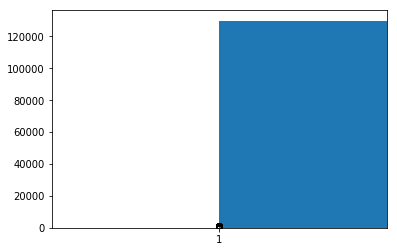

In [14]:
plt.boxplot(list(dictionnaire_userId.values()));
plt.hist(list(dictionnaire_userId.values()),bins=10);


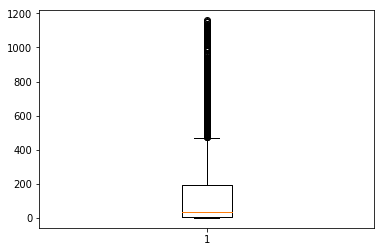

In [15]:
plt.boxplot(list(dictionnaire_movieId.values()));

In [16]:
df.describe()

,movieId_ref,userId,rating,nb_userId,nb_movieId
count,442548.000000,442548.000000,442548.000000,442548.000000,442548.000000
mean,5268.435033,69278.121212,3.113944,445.072605,609.781158
std,4739.926185,39265.684746,1.017816,150.425163,302.235497
min,9.000000,116.000000,0.500000,303.000000,101.000000
25%,1607.000000,35004.000000,2.500000,342.000000,351.000000
50%,3606.000000,69378.000000,3.000000,395.000000,620.000000
75%,7566.000000,102911.000000,4.000000,492.000000,860.000000
max,21945.000000,138397.000000,5.000000,1270.000000,1159.000000


In [17]:
print("dimension",df.shape)
print("nombre de user",len(df.userId.unique()))
print("nombre de movies",len(df.movieId_ref.unique()))
print(len(df.movieId_ref.unique()))

dimension (442548, 5)
nombre de user 1168
nombre de movies 1061
1061


In [18]:
df.head()

,movieId_ref,userId,rating,nb_userId,nb_movieId
2,9,116,1.5,412,284
5,9,156,3.0,486,284
18,9,768,3.0,740,284
24,9,903,2.0,514,284
26,9,982,2.5,556,284


In [19]:
df.nb_userId.describe()

count    442548.000000
mean        445.072605
std         150.425163
min         303.000000
25%         342.000000
50%         395.000000
75%         492.000000
max        1270.000000
Name: nb_userId, dtype: float64

In [20]:
np.percentile(df.nb_userId)

TypeError: percentile() missing 1 required positional argument: 'q'

In [21]:
len(df.movieId_ref.unique())
correspondance_movie=pd.DataFrame({'movieId_ref':list(df.movieId_ref.unique()),'movie_Action':range(0,len(df.movieId_ref.unique()))})
correspondance_movie=pd.merge(df, correspondance_movie, how='outer')

correspondance_Id=pd.DataFrame({'userId':list(df.userId.unique()),'Id_Action':range(0,len(df.userId.unique()))})
correspondance_movie=pd.merge(correspondance_Id, correspondance_movie, how='outer')
to_drop=[ 'nb_userId',
       'nb_movieId']
correspondance_movie.drop(to_drop,axis=1,inplace=True)
correspondance_movie.head()

,userId,Id_Action,movieId_ref,rating,movie_Action
0,116,0,9,1.5,0
1,116,0,10,2.0,1
2,116,0,15,0.5,2
3,116,0,20,2.0,3
4,116,0,23,1.5,4


In [22]:
correspondance_movie.to_csv("../new_dataset/action_movies.csv")